<a href="https://colab.research.google.com/github/gno-lit/DSI/blob/main/Pre-assignment/DSI_Pre_Assignment_(Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION
This is my submission for the DSI pre-assignment for Python.

Github account is found [here](https://github.com/gno-lit)

The repo for the assignment can be found [here](https://github.com/gno-lit/DSI)





### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install tqdm
import random, tqdm

### 1
#### Create a regular hexagon

> The equation for generating vertices of an n-sided polygon with sides of equal length L, angle of rotation A, and number of sides n is given by


`x , y = Lcos((2πk/n)+A) , Lsin((2πk/n)+A)` for `k= 0, ..., n−1`.

Source found [here](https://math.stackexchange.com/questions/3000209/equation-for-calculating-the-vertices-of-a-regular-polygon-given-a-line-segment)

> The hexagon() function uses the formula above to generate these vertices which are essentially cordinates of the hexagon

In [3]:
def hexagon(length, angle=0, center=(0, 0), n_sides=6):
    coordinates = []
    for n in range(n_sides):
        x = length * np.cos(2*np.pi*n/n_sides + angle) + center[0]
        y = length * np.sin(2*np.pi*n/n_sides + angle) + center[1]
        coordinates.append((x, y))
    coordinates.append(coordinates[0])
    return coordinates

[(50.0, 0.0), (25.000000000000007, 43.30127018922193), (-24.99999999999999, 43.30127018922194), (-50.0, 6.123233995736766e-15), (-25.00000000000002, -43.30127018922192), (25.000000000000007, -43.30127018922193), (50.0, 0.0)]


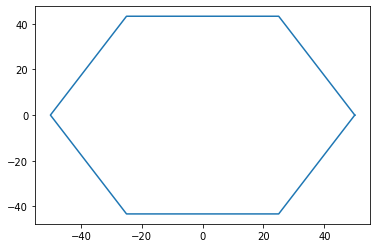

In [5]:
vertices = hexagon(50)
x = np.array([i[0] for i in vertices])
y = np.array([i[1] for i in vertices])
print(vertices)
plt.plot(x, y)

###2
#### Pick a random point, P, inside the hexagon. 

In [6]:

def random_point(x, y, boundary=15):
  # function creates a random point within the boundary of the hexagon
  x_min, x_max = np.min(x)+boundary, np.max(x)-boundary
  y_min, y_max = np.min(y)+boundary, np.max(y)-boundary
  P_x = np.random.randint(x_min, x_max)
  P_y = np.random.randint(y_min, y_max)
  return P_x, P_y

###3
#### Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon

In [7]:
def euclidean_distance(x0, x1, y0, y1):
  #function calculates distance betwen two points with cordinates (x,y)
  return round(np.sqrt((x0-x1)**2 + (y0-y1)**2), 4)

for i in range(len(vertices)):
  if i == len(vertices)-1:
      continue
  distance = euclidean_distance(vertices[i][0], vertices[i+1][0], vertices[i][1], vertices[i+1][1])
  print(f'distance of vertex {i} from vertex {i+1} is: {distance}')

distance of vertex 0 from vertex 1 is: 50.0
distance of vertex 1 from vertex 2 is: 50.0
distance of vertex 2 from vertex 3 is: 50.0
distance of vertex 3 from vertex 4 is: 50.0
distance of vertex 4 from vertex 5 is: 50.0
distance of vertex 5 from vertex 6 is: 50.0


In [8]:
# creating a function for selecting random vertices and ensuring that distance between the vertices is equal to euclidean distance between two adjacent vertices
def rand_vertice_idx(x, y, vertex_idx):
    random_idx = random.choice(list(enumerate(y)))[0]
    while True:
        if euclidean_distance(x[vertex_idx], x[random_idx], y[vertex_idx], y[random_idx]) != distance:
            random_idx = random.choice(list(enumerate(y)))[0]
        else:
            break
    return random_idx

P: (-14, 12)
[ 50.  25. -25. -50. -25.  25.  50.] [ 0.00000000e+00  4.33012702e+01  4.33012702e+01  6.12323400e-15
 -4.33012702e+01 -4.33012702e+01  0.00000000e+00]
[ 50.  25. -25. -50. -25.  25.  50. -14.  25.] [ 0.00000000e+00  4.33012702e+01  4.33012702e+01  6.12323400e-15
 -4.33012702e+01 -4.33012702e+01  0.00000000e+00  1.20000000e+01
 -4.33012702e+01]


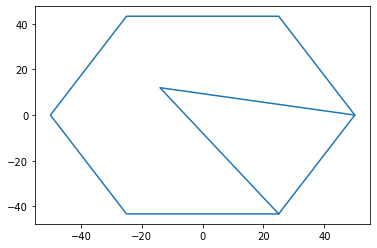

In [9]:
rand_idx = rand_vertice_idx(x, y, -1)
P_x, P_y = random_point(x, y)
x_new, y_new = np.append(x, P_x), np.append(y, P_y)
x_new, y_new = np.append(x_new, x[rand_idx]), np.append(y_new, y[rand_idx])

print(f'P: {(P_x, P_y)}')
print(x,y)
print(x_new,y_new)
plt.plot(x_new,y_new)

###4
#### Computing the centroid of T which becomes the new random point, P. 
>Repeat previous step 10,000 times. 



In [10]:

def vertices(x, y):
    v1_randidx = random.choice(list(enumerate(x)))[0]
    v1 = x[v1_randidx], y[v1_randidx]
    v2_randidx = rand_vertice_idx(x, y, v1_randidx)
    v2 = x[v2_randidx], y[v2_randidx]
    return v1, v2


centroids = []

for i in tqdm.tqdm(range(10000)):
    v1, v2 = vertices(x, y)
    P = (P_x, P_y)
    x_vals = np.array([v1[0], v2[0], P[0]])
    y_vals = np.array([v1[1], v2[1], P[1]])
    centroid = np.sum(x_vals)/3, np.sum(y_vals)/3
    centroids.append(centroid)
    P = centroid


100%|██████████| 10000/10000 [00:00<00:00, 13776.46it/s]


###5
#### Making a scatter plot of all  10,000 random points

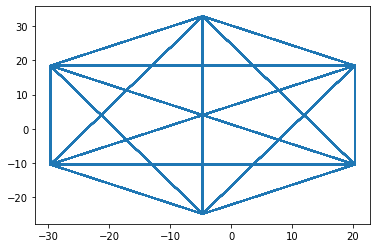

In [11]:
x_centroids = np.array([i[0] for i in centroids])

y_centroids = np.array([i[1] for i in centroids])

plt.plot(x_centroids, y_centroids)

>>Resulting image looks like a combinatronics representation